In [2]:
%reload_ext rpy2.ipython
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

Kernel density estimation is equivalent to convolution between the empirical density function, $f_X(t)$, and a kernel $k(\cdot)$:

$$\eqalign{
(f_X * k)(x) &= \int_{\mathbb{R}} f_X(x - y) k(y) dy \\
             &=\int_{\mathbb{R}}  \frac{1}{n}\sum_{i=1}^{n} \delta(x-y-x_i) k(y) dy \\
             &= \frac{1}{n}\sum_{i=1}^{n}\int_{\mathbb{R}}  \delta(x-y-x_i) k(y) dy \\
             &=\frac{1}{n}\sum_{i=1}^{n} k(x_i-x).
}$$


$$\eqalign{
(f_X * k)(x) &= \int_{\mathbb{R}} f_X(x - y) k(y) dy \\
             &=\int_{\mathbb{R}}  \frac{1}{n}\sum_{i=1}^{n} \delta(x-y-x_i) k(y) dy \\
             &= \frac{1}{n}\sum_{i=1}^{n}\int_{\mathbb{R}}  \delta(x-y-x_i) k(y) dy \\
             &=\frac{1}{n}\sum_{i=1}^{n} k(x_i-x).
}$$

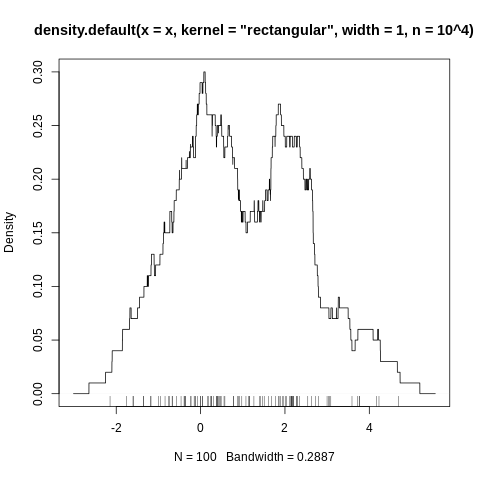

In [3]:
%%R
set.seed(2346639)
x <- c(rnorm(50), rnorm(50,2))
x = sort(x)
plot(density(x, kernel='rectangular', width=1, n = 10**4))
rug(x)

In [5]:
%%R
library('ggplot2', lib="/home/alexpmil/.local/R_libs/")
#library('gganimate', lib="/home/alexpmil/.local/R_libs/")
#library('gifski', lib="/home/alexpmil/.local/R_libs/")
#library('png', lib="/home/alexpmil/.local/R_libs/")
library('gridExtra', lib="/home/alexpmil/.local/R_libs/")


require(stringr)
require(grid)
require(repr)
require(dplyr)


Error: package or namespace load failed for ‘ggplot2’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 there is no package called ‘gtable’


In [7]:
%%R
library('ggplot2')
#require(dplyr)

In [8]:
%%R
x

  [1] -2.146757349 -1.751475803 -1.602416252 -1.596334911 -1.355364554
  [6] -1.348160999 -1.184195016 -1.175677313 -0.996654810 -0.946035875
 [11] -0.842957223 -0.765269094 -0.736098231 -0.675496893 -0.665124126
 [16] -0.565678246 -0.463509718 -0.391978252 -0.380025291 -0.366799795
 [21] -0.351286900 -0.228794658 -0.228613497 -0.153392044 -0.132234494
 [26] -0.126703484 -0.077459693 -0.006702789  0.001840414  0.047083428
 [31]  0.050646412  0.156518796  0.188051923  0.233814081  0.256242011
 [36]  0.263725189  0.305953622  0.377840466  0.380685046  0.395155664
 [41]  0.407581124  0.421100836  0.446940192  0.465473812  0.486677700
 [46]  0.555573530  0.576607526  0.773962634  0.781408253  0.881017969
 [51]  0.897022894  0.923677792  0.978016745  1.075666619  1.137814810
 [56]  1.151413594  1.156857187  1.264625881  1.396739589  1.414430276
 [61]  1.474244821  1.507112652  1.610707924  1.676514530  1.769046738
 [66]  1.846818450  1.860579267  1.900537821  1.935651701  1.973636420
 [71] 

In [12]:
%%R -w 1000 -h 500 -u px

# kernel
bandwidth = 0.1
X = seq(-3, 3, length.out=100)
density = dnorm(X/bandwidth)/bandwidth
kdf = data.frame(cbind(X,density))

under_curve_limits = sort(X[(density>0.01)])
under_curve_limits = c(under_curve_limits[1], under_curve_limits[length(under_curve_limits)])
under_curve_limits

raw_data = data.frame(x)
raw_data$height = 0.1
raw_points_under_curve = (raw_data$x < under_curve_limits[2]) & (raw_data$x > under_curve_limits[1])
raw_data[raw_points_under_curve, 'height'] = dnorm(raw_data[raw_points_under_curve, 'x']/bandwidth)/bandwidth
raw_data$under_curve = 'no'
raw_data[raw_points_under_curve, 'under_curve'] = 'yes'
raw_data$under_curve = as.character(raw_data$under_curve)

p = ggplot(kdf, aes(x=X, y=density)) +  
    geom_line(color='red', size=1.5) +
    geom_segment(data=raw_data, aes(x=x, y=0, xend=x, yend=height, color=under_curve)) + 
    scale_color_manual(values=c('black', 'green')) +
    theme_bw() +
    theme(
        panel.background = element_rect(fill='white'),
        plot.margin = margin(1, 0.5, 2.5, 1, "cm"),
        #plot.background = element_rect(fill=theme_bg),
        plot.title=element_text(size=24, family="Arial", face="bold"),
        plot.subtitle=element_text(size=16),
        axis.title=element_text(size=18), 
        axis.text=element_text(size=16)
    )

In [16]:
%%R
library(plotly)
ggplotly(p)

RRuntimeError: Error in viewer(index_html) : 
  'browser' must be a non-empty character string


In [9]:
%%R -w 1000 -h 500 -u px

anim_x_start = -2
anim_x_end = 4
anim_x_step = 0.5

anim_state = 1
anim_x = anim_x_start
n_frames = 10

for (anim_state in seq(1,n_frames)){

    # kernel
    bandwidth = 0.1
    X = seq(anim_x-2, anim_x+2, length.out=100)
    density = dnorm(X/bandwidth)/bandwidth
    kdf = data.frame(cbind(X,density))
    kdf$anim_state = anim_state
    
    if (anim_state==1) {
        anim_kdf = kdf
    }
    else{
        anim_kdf = rbind(anim_kdf, kdf)
    }
    
    under_curve_limits = sort(X[(density>0.01)])
    under_curve_limits = c(under_curve_limits[1], under_curve_limits[length(under_curve_limits)])
    under_curve_limits

    raw_data = data.frame(x)
    raw_data$height = 0.1
    raw_points_under_curve = (raw_data$x < under_curve_limits[2]) & (raw_data$x > under_curve_limits[1])
    raw_data[raw_points_under_curve, 'height'] = dnorm(raw_data[raw_points_under_curve, 'x']/bandwidth)/bandwidth
    raw_data$under_curve = 'no'
    raw_data[raw_points_under_curve, 'under_curve'] = 'yes'
    raw_data$under_curve = as.character(raw_data$under_curve)
    raw_data$anim_state = anim_state
    
    if (anim_state==1) {
        anim_raw_data = raw_data
    } else {
        anim_raw_data = rbind(anim_raw_data, raw_data)
    }
}



In [10]:
%%R

ggplot(anim_kdf, aes(x=X, y=density)) +  
    geom_line(color='red', size=1.5) +
    geom_segment(data=anim_raw_data, aes(x=x, y=0, xend=x, yend=height, color=under_curve)) + 
    scale_color_manual(values=c('black', 'green')) +
    theme_bw() +
    theme(
        panel.background = element_rect(fill='white'),
        plot.margin = margin(1, 0.5, 2.5, 1, "cm"),
        #plot.background = element_rect(fill=theme_bg),
        plot.title=element_text(size=24, family="Arial", face="bold"),
        plot.subtitle=element_text(size=16),
        axis.title=element_text(size=18), 
        axis.text=element_text(size=16)
    ) +
    transition_time(anim_state) +
    transition_states(
        anim_state,
        transition_length = 0.5,
        state_length = 2
    ) +
    enter_fade() + 
    exit_shrink() +
    ease_aes('linear')
    #ease_aes('sine-in-out')

/home/alexpmil/.conda/envs/conda_env/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in transform_path(all_frames, next_state, ease, params$transition_length[i],  : 
  transformr is required to tween paths and lines

  warnings.warn(x, RRuntimeWarning)


RRuntimeError: Error in transform_path(all_frames, next_state, ease, params$transition_length[i],  : 
  transformr is required to tween paths and lines


In [14]:
%%R
?renderers

R Help on ‘renderers’renderers              package:gganimate               R Documentation

_R_e_n_d_e_r_e_r_s _p_r_o_v_i_d_e_d _b_y _g_g_a_n_i_m_a_t_e

_D_e_s_c_r_i_p_t_i_o_n:

     The purpose of the renderer function is to take a list of image
     files and assemble them into an animation. ‘gganimate’ provide a
     range of renderers but it is also possible to provide your own, if
     the supplied ones are lacking in any way. A renderer is given as
     argument to ‘animate()’/print() and receives the paths to the
     individual frames once they have been created.

_U_s_a_g_e:

     gifski_renderer(file = tempfile(fileext = ".gif"), loop = TRUE,
       width = NULL, height = NULL)
     
     file_renderer(dir = ".", prefix = "gganim_plot", overwrite = FALSE)
     
     av_renderer(file = NULL, vfilter = "null", codec = NULL,
       audio = NULL)
     
     ffmpeg_renderer(format = "auto", ffmpeg = NULL,
       options = list(pix_fmt =